In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Lambda,Flatten
from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=(train.ix[:,1:].values).astype('float32')
y_train=train.ix[:,0].values.astype('int32')

x_test=test.values.astype('float32')

C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [5]:
x_train.shape

(42000, 784)

In [6]:
y_train.shape

(42000,)

**Previewing image**

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28)

In [8]:
x_train.shape

(42000, 28, 28)

Number is 7


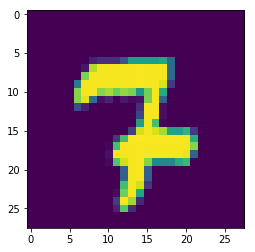

In [9]:
#change index to view other images
index=678
plt.imshow(x_train[index])
print('Number is',y_train[index])

In [10]:
x_train=x_train.reshape(x_train.shape[0],28*28)

In [11]:
x_train.shape,x_test.shape

((42000, 784), (28000, 784))

**Preprocessing**

In [12]:
x_train/=255
x_test/=255

In [13]:
#One Hot Encoding 
#I guess everybody knows this otherwise google

from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

In [14]:
y_train.shape

(42000, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


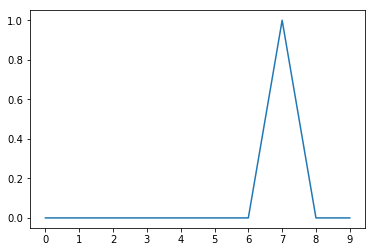

In [15]:
#same as above to verify as if it correct
print(y_train[index])
plt.plot(y_train[index])
plt.xticks(range(10))
plt.show()

**NN**

In [16]:
np.random.seed(34)

# Model 1

In [87]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=784))
model.add(Dropout(0.15))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(10,activation='softmax'))

In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(optimizer=RMSprop(lr=0.005),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
cache=model.fit(x_train,y_train,epochs=50,batch_size=64, validation_split=0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/50
39900/39900 [==============================] - 6s 162us/step - loss: 0.5837 - acc: 0.8187 - val_loss: 0.2696 - val_acc: 0.9243
Epoch 2/50
39900/39900 [==============================] - 5s 123us/step - loss: 0.3661 - acc: 0.8946 - val_loss: 0.2540 - val_acc: 0.9224
Epoch 3/50
39900/39900 [==============================] - 5s 122us/step - loss: 0.3224 - acc: 0.9086 - val_loss: 0.2376 - val_acc: 0.9367
Epoch 4/50
39900/39900 [==============================] - 5s 119us/step - loss: 0.3059 - acc: 0.9148 - val_loss: 0.2267 - val_acc: 0.9414
Epoch 5/50
39900/39900 [==============================] - 5s 120us/step - loss: 0.2916 - acc: 0.9195 - val_loss: 0.2213 - val_acc: 0.9438
Epoch 6/50
39900/39900 [==============================] - 5s 122us/step - loss: 0.2904 - acc: 0.9220 - val_loss: 0.2094 - val_acc: 0.9495
Epoch 7/50
39900/39900 [==============================] - 5s 124us/step - loss: 0.2794 - acc: 0.9247 - val_loss: 0.2186 - v

In [91]:
cache_df=pd.DataFrame(cache.history)
cache_df

,acc,loss,val_acc,val_loss
0,0.818697,0.583680,0.924286,0.269561
1,0.894561,0.366105,0.922381,0.254002
2,0.908571,0.322356,0.936667,0.237590
3,0.914812,0.305943,0.941429,0.226732
4,0.919549,0.291637,0.943810,0.221289
5,0.921955,0.290364,0.949524,0.209410
6,0.924712,0.279431,0.944286,0.218577
7,0.925990,0.277077,0.943810,0.209247
8,0.926992,0.273271,0.945238,0.224771
9,0.928145,0.270892,0.942857,0.237495


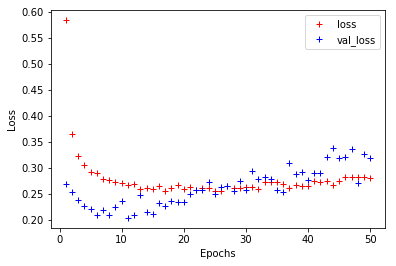

In [92]:
epochs=range(1,cache_df.shape[0]+1)

plt.plot(epochs,cache_df['loss'],'r+',label='loss')
plt.plot(epochs,cache_df['val_loss'],'b+',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

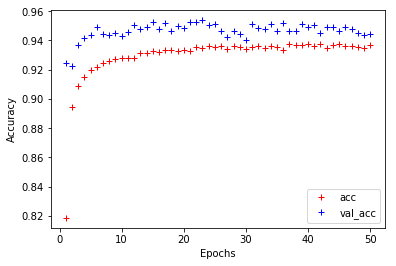

In [93]:
plt.plot(epochs,cache_df['acc'],'r+',label='acc')
plt.plot(epochs,cache_df['val_acc'],'b+',label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [94]:
preds=model.predict_classes(x_test,verbose=0)

In [95]:
preds[0:5]

array([2, 0, 9, 9, 3], dtype=int64)

In [86]:
subs=pd.DataFrame({"ImageId":list(range(1,len(preds)+1)),"Label":preds})
subs.to_csv("sub3_3.csv",index=False,header=True)

alpha=0.0001
3_1 - epoch=20

3_2_1 - pre train+25
3_2_2 - retrain 25
3_2_3 - retrain 100

alpha=0.005 
3_3 epoch=50

alpha=0.01
3_4 epoch=25

# Best Leaderboard score - 0.95371 for sub3_3